# **Imports**

> First we need to import librares to implement our code. We use pandas, matplotlip, seaborn and numpy to visualize our match_data_20250110_164426.csv file.



In [60]:
import pandas as pd  # For handling data
import matplotlib.pyplot as plt  # For basic plotting


# **Reading the Raw Data from csv**


In [61]:
# Load the dataset
file_path = '/content/sample_data/match_data_20250110_164426.csv'  # Update this path if necessary
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Match_Status,Team1,Team2,Score,Goals
0,59' (Ended early),EGEMENPROJETAKIMI,VITORIA SPORT CLUBE,1 - 3,37' Erling Haaland
1,FT,EGEMENPROJETAKIMI,AVATAR FC,2 - 1,27' Ousmane Dembele | 49' Virgil van Dijk | 75...
2,FT,EGEMENPROJETAKIMI,KRAL,2 - 1,23' Ousmane Dembele | 54' Ousmane Dembele
3,39' (Ended early),EGEMENPROJETAKIMI,WHOSYADADDY,3 - 0,8' Erling Haaland | 33' Erling Haaland
4,FT,EGEMENPROJETAKIMI,MOUSTAPHA,3 - 2,43' Vini Jr. | 54' Ousmane Dembele | 78' Rodri...


In [62]:
data.tail()

,Match_Status,Team1,Team2,Score,Goals
671,FT,EGEMENPROJETAKIMI,MANCHESTER C,3 - 1,39' Vini Jr. | 72' (PEN) Jude Bellingham | 90'...
672,46' (Ended early),EGEMENPROJETAKIMI,ASTON V,3 - 0,6' Jude Bellingham | 44' Aurelien Tchouameni
673,FT,EGEMENPROJETAKIMI,R MADRID,3 - 3,6' Antonio Rudiger | 17' Vini Jr. | 43' Vini J...
674,84' (Ended early),EGEMENPROJETAKIMI,R MADRID,1 - 3,73' Vini Jr.
675,FT,EGEMENPROJETAKIMI,Dream FC,0 - 0,NaN


# **What is done?**

So far we upload our file to the path it seen on the code and now we can see the content of it.

Match_Status: This part reflects the status of our matches either as (ended early, the minute shows how many minutes the game played till a connection error occurs) or FT (game is played 90 minutes).

Team1: Shows my team, I changed my team to prevent some conflicts hence there would be more team having same name.

Team2: Opponent teams' name

Score: Shows the game score with an order where the first one is my team's score and the second score is the opponent's.

Goals: Shows my players' score contrubution. It does not count the opponent's one.





**The Total Time I Spent to Play**

Assume that 1 match spends approximately 5 minutes (change according to stops, breaks etc.) Calculate the approximate amount of time I spent.

In [63]:
import pandas as pd

# Initialize total time in seconds
total_time_seconds = 0

# Iterate through matches involving your team
for _, row in my_team_matches.iterrows():
    match_status = row['Match_Status']
    if match_status == 'FT':  # Full-time match
        total_time_seconds += 5 * 60  # Convert 5 minutes to seconds
    elif "'" in match_status:  # Match ended early (e.g., '46')
        try:
            minutes_played = int(match_status.replace("'", ""))
            proportion = minutes_played / 90  # Calculate proportion of full match
            total_time_seconds += proportion * 5 * 60  # Convert to seconds
        except ValueError:
            continue  # Skip any malformed match statuses

# Convert total time to days, hours, minutes, and seconds
days = total_time_seconds // (24 * 3600)
remaining_seconds = total_time_seconds % (24 * 3600)

hours = remaining_seconds // 3600
remaining_seconds %= 3600

minutes = remaining_seconds // 60
remaining_seconds %= 60

# Create a formatted string dynamically excluding "0" values
time_parts = []
if days > 0:
    time_parts.append(f"{int(days)} days")
if hours > 0:
    time_parts.append(f"{int(hours)} hours")
if minutes > 0:
    time_parts.append(f"{int(minutes)} minutes")
if remaining_seconds > 0:
    time_parts.append(f"{int(remaining_seconds)} seconds")

# Join the non-zero parts
formatted_time = ", ".join(time_parts)

# Create a DataFrame for tabular presentation
time_data = {
    'Time Spent': [formatted_time]
}
time_df = pd.DataFrame(time_data)

# Display the table
time_df


,Time Spent
0,"1 days, 17 hours, 10 minutes"


# **Distribution of Game results**

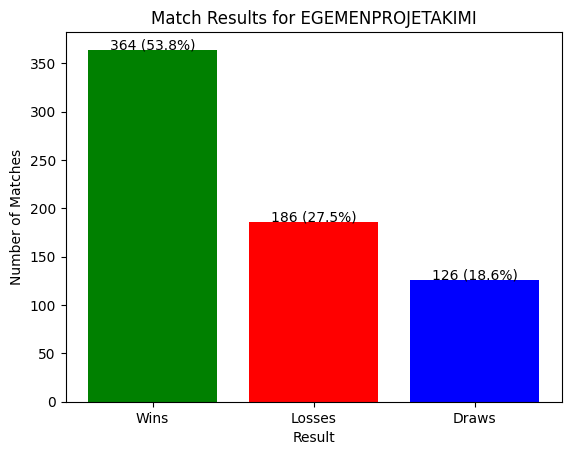

In [64]:
import matplotlib.pyplot as plt

# Filter matches involving your team
my_team = 'EGEMENPROJETAKIMI'
my_team_matches = data[(data['Team1'] == my_team) | (data['Team2'] == my_team)]

# Determine results
wins = 0
losses = 0
draws = 0

for _, row in my_team_matches.iterrows():
    score_team1, score_team2 = map(int, row['Score'].split('-'))
    if row['Team1'] == my_team:
        if score_team1 > score_team2:
            wins += 1
        elif score_team1 < score_team2:
            losses += 1
        else:
            draws += 1
    elif row['Team2'] == my_team:
        if score_team2 > score_team1:
            wins += 1
        elif score_team2 < score_team1:
            losses += 1
        else:
            draws += 1

# Total matches
total_matches = wins + losses + draws

# Calculate proportions
win_percentage = (wins / total_matches) * 100
loss_percentage = (losses / total_matches) * 100
draw_percentage = (draws / total_matches) * 100

# Prepare data for plotting
labels = ['Wins', 'Losses', 'Draws']
values = [wins, losses, draws]
percentages = [win_percentage, loss_percentage, draw_percentage]

# Plot the results
plt.bar(labels, values, color=['green', 'red', 'blue'])

# Add exact numbers and percentages above each bar
for i, (value, percentage) in enumerate(zip(values, percentages)):
    plt.text(i, value + 0.2, f'{value} ({percentage:.1f}%)', ha='center', fontsize=10)

# Add titles and labels
plt.title('Match Results for EGEMENPROJETAKIMI')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.show()


# **The Score Distribution**






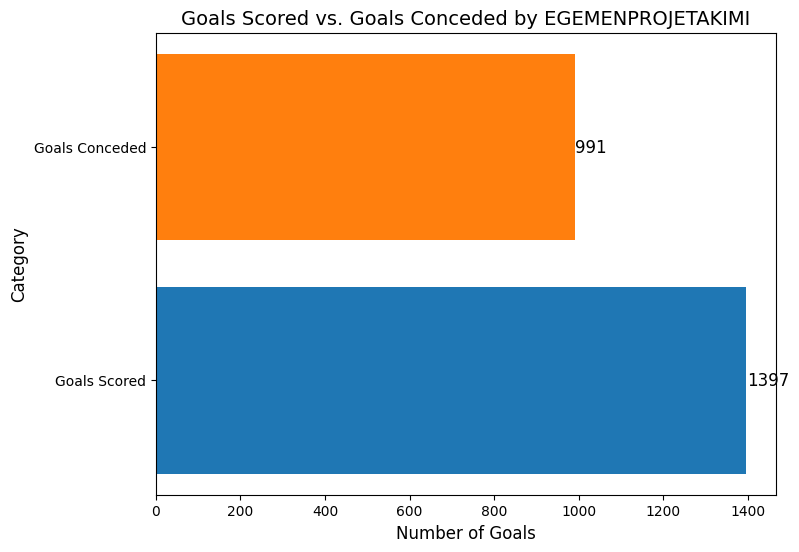

In [65]:
# Initialize counters for goals scored and conceded
total_goals_scored = 0
total_goals_conceded = 0

# Loop through each match involving your team
for _, row in my_team_matches.iterrows():
    score = row['Score']
    if not pd.isna(score) and '-' in score:  # Ensure score is valid and in the format "x-y"
        team1_goals, team2_goals = map(int, score.split('-'))
        if row['Team1'] == 'EGEMENPROJETAKIMI':  # Your team is Team1
            total_goals_scored += team1_goals
            total_goals_conceded += team2_goals
        elif row['Team2'] == 'EGEMENPROJETAKIMI':  # Your team is Team2
            total_goals_scored += team2_goals
            total_goals_conceded += team1_goals

# Data for plotting
categories = ['Goals Scored', 'Goals Conceded']
values = [total_goals_scored, total_goals_conceded]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.barh(categories, values, color=['#1f77b4', '#ff7f0e'])

# Adding data labels on the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, str(bar.get_width()),
             va='center', fontsize=12)

# Title and labels
plt.title("Goals Scored vs. Goals Conceded by EGEMENPROJETAKIMI", fontsize=14)
plt.xlabel("Number of Goals", fontsize=12)
plt.ylabel("Category", fontsize=12)

# Display the horizontal bar chart
plt.show()

# **Score Distribution**







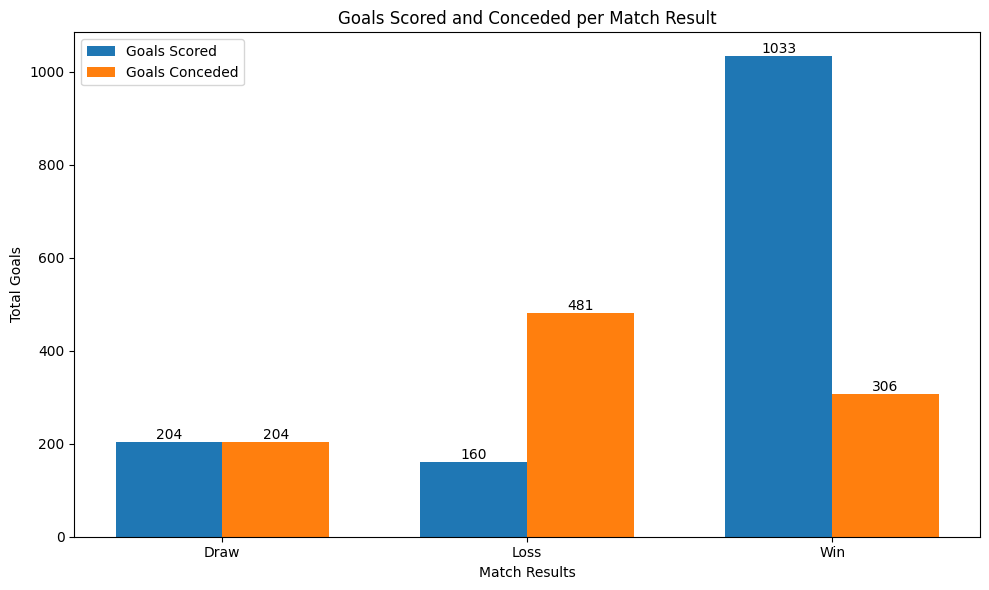

In [66]:
import matplotlib.pyplot as plt

# Bar chart setup
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(results_summary))

# Bar chart for goals scored
bars1 = ax.bar(x, results_summary['Total_Goals_Scored'], width=bar_width, label='Goals Scored')

# Bar chart for goals conceded
bars2 = ax.bar([p + bar_width for p in x], results_summary['Total_Goals_Conceded'], width=bar_width, label='Goals Conceded')

# Add exact numbers on top of each bar
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.0f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.0f}', ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Match Results')
ax.set_ylabel('Total Goals')
ax.set_title('Goals Scored and Conceded per Match Result')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(results_summary['Result'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# **Proportional Distribution of The Goals**




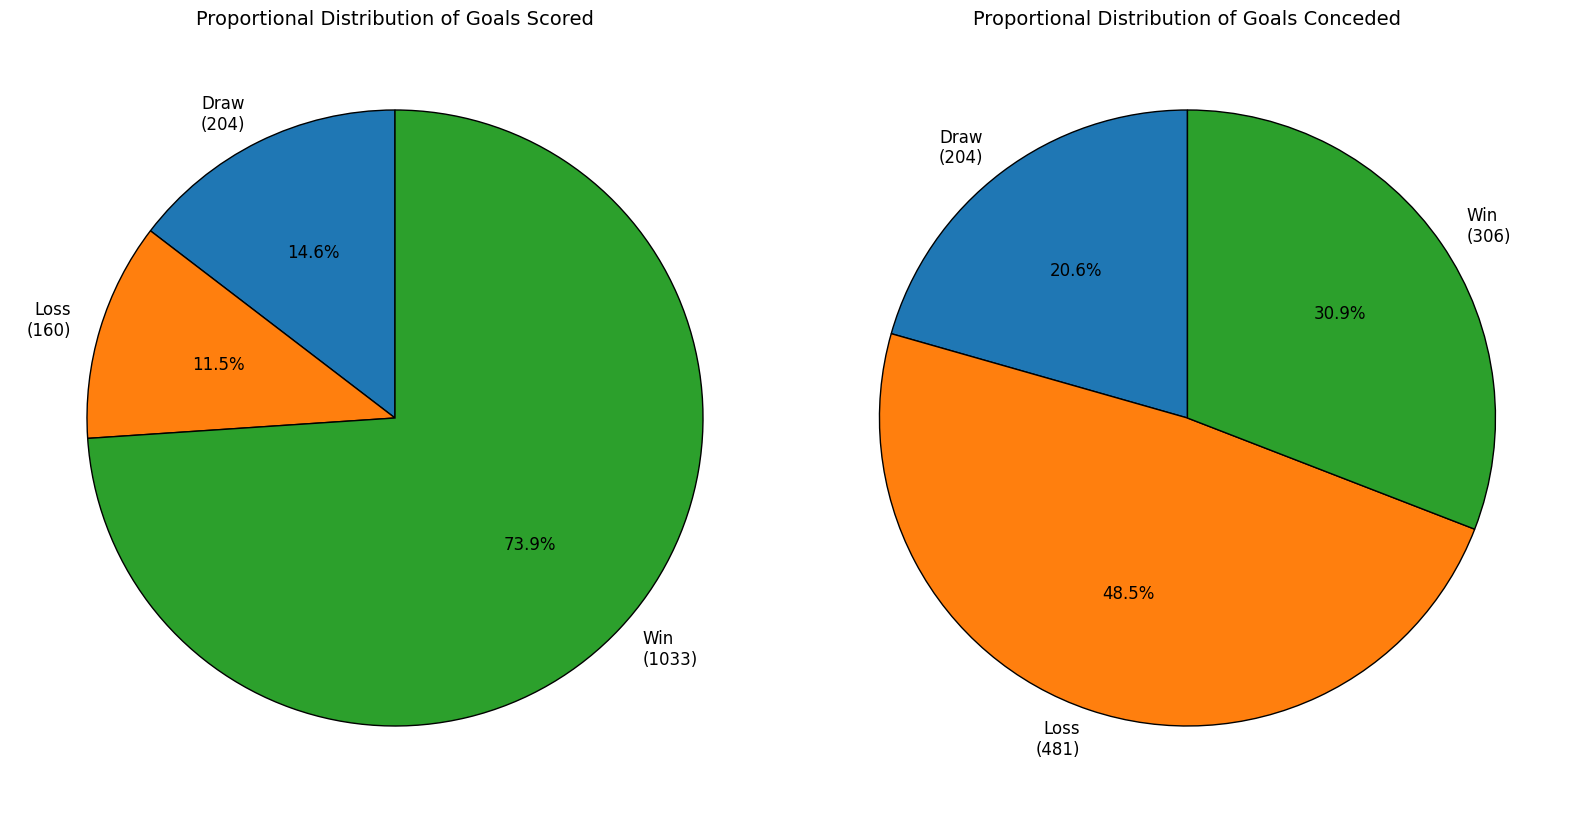

In [67]:
# Calculate total goals scored and conceded for each result type
total_goals_scored = results_summary['Total_Goals_Scored']
total_goals_conceded = results_summary['Total_Goals_Conceded']

# Labels for the pie charts
labels = results_summary['Result']

# Pie chart for goals scored
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # Two side-by-side pie charts

# Goals Scored Pie Chart
ax[0].pie(
    total_goals_scored,
    labels=[f"{label}\n({value})" for label, value in zip(labels, total_goals_scored)],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
ax[0].set_title('Proportional Distribution of Goals Scored', fontsize=14)

# Goals Conceded Pie Chart
ax[1].pie(
    total_goals_conceded,
    labels=[f"{label}\n({value})" for label, value in zip(labels, total_goals_conceded)],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)
ax[1].set_title('Proportional Distribution of Goals Conceded', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()


#**Top Scorers**

This graph will show the players that I scored most with them and their scores' proportion to total score amount of the team.

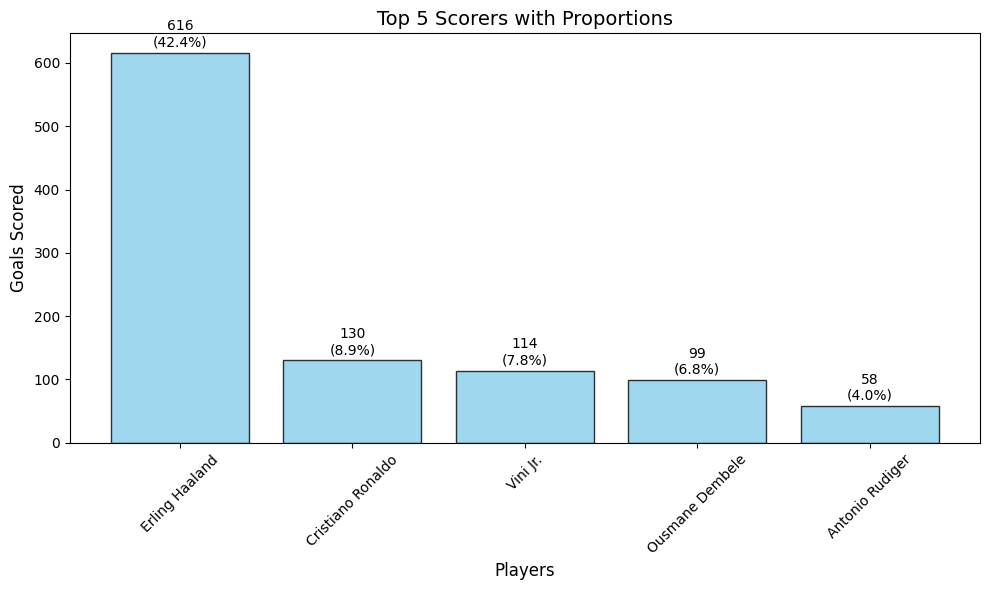

In [68]:
# Calculate total goals scored
total_goals = scorer_counts.sum()

# Plot the updated bar chart with proportions
plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_scorers.index,
    top_scorers.values,
    color='skyblue',
    edgecolor='black',
    alpha=0.8
)

# Add numerical values (goal counts and proportions) on the bars
for bar, goals in zip(bars, top_scorers):
    proportion = (goals / total_goals) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 10,
        f"{goals}\n({proportion:.1f}%)",
        ha='center',
        fontsize=10
    )

# Labeling and title
plt.xlabel('Players', fontsize=12)
plt.ylabel('Goals Scored', fontsize=12)
plt.title('Top 5 Scorers with Proportions', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()
